In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 97% 1.03G/1.06G [00:08<00:00, 355MB/s]
100% 1.06G/1.06G [00:08<00:00, 133MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
#importing needed libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [ ]:
#generators --used to process large amounts of data
#generators-- training and validating
#train
train_ds=keras.utils.image_dataset_from_directory('/content/train',
labels='inferred',#default
label_mode='int',#previously chossen output as 0's and 1's so we have taken as int
batch_size=32,#for procesing it takes 32 images as per batch
image_size=(256,256) # all images are resized into same dimensions to maintain the cinsistency
)

Found 20000 files belonging to 2 classes.


In [ ]:
#validating
validate_ds=keras.utils.image_dataset_from_directory('/content/test',
labels='inferred',
label_mode='int',
batch_size=32,
image_size=(256,256)
)

Found 5000 files belonging to 2 classes.


In [ ]:
#normalising the numpy array
#try to get iamge, label and transform
#pixels should be between 0 to 1
#0.,1.
def process(image,label):
  image=tf.cast(image/255.,tf.float32)
  #converting the pixel values into float
  return image,label
train_ds=train_ds.map(process)
validate_ds=validate_ds.map(process)

In [ ]:
#building a cnn model and passing the data into cnn model
#cnn - convolutional neural networks
#3 layers -- 32,64,128
model = Sequential()

#1st convolutional block
#32 filters
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
#padding=valid -- no padding around the image, reduces the image size slightly
#relu --rectified linear unit to maintain the non linearity
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
#maxpooling 2D -- takes 2*2 area and keeps only maximum value / down sampling (choosing the highest value )


model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
#try to maintain all the layers connected

model.add(Dense(128,activation='relu'))
#dense usage 128 neurons with relu activation
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
#output layer

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#compiling the model
# here if loss decrese , accuracy increases and vise versa
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(train_ds,epochs=10,validation_data=validate_ds)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 73ms/step - accuracy: 0.5907 - loss: 0.6623 - val_accuracy: 0.7200 - val_loss: 0.5393
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 68ms/step - accuracy: 0.7254 - loss: 0.5328 - val_accuracy: 0.7928 - val_loss: 0.4532
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 66ms/step - accuracy: 0.8133 - loss: 0.4090 - val_accuracy: 0.8006 - val_loss: 0.4997
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 67ms/step - accuracy: 0.8697 - loss: 0.2965 - val_accuracy: 0.8000 - val_loss: 0.6385
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - accuracy: 0.9294 - loss: 0.1728 - val_accuracy: 0.7706 - val_loss: 0.8330
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 74ms/step - accuracy: 0.9618 - loss: 0.0996 - val_accuracy: 0.7696 - val_loss: 0.9107
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.9729 - loss: 0.0790 - val_accuracy: 0.7848 - val_loss: 0.9739
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.9825 - loss: 0.0521 - 

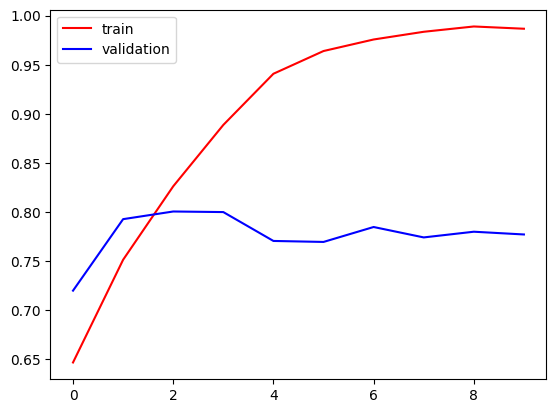

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

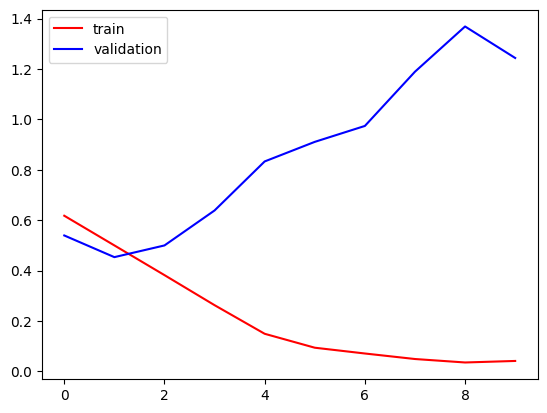

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2
test_img=cv2.imread('/content/puppy-01.jpeg.jpg')
test_img.shape
test_img=cv2.resize(test_img,(256,256))
test_input = test_img.reshape(1,256,256,3)
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 853ms/step


array([[1.]], dtype=float32)

In [ ]:
import cv2
test_img=cv2.imread('/content/cat-01.jpeg.jpg')
test_img.shape
test_img=cv2.resize(test_img,(256,256))
test_input = test_img.reshape(1,256,256,3)
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[0.]], dtype=float32)